

# HOSPITAL DATA

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The hospital dataset is a collection of over 100,000 medical appointments information in Brazil over a period of time. The dataset is centered around whether patients show up for their appointments or not.
The dataset contains;
a) "ScheduledDay" column that tells us the appointment day of a patient.
b) "Neighbourhood" which indicates the location of the hospital.
c) "Scholarship" which indicates if a patient is under the Brezilian welfare program or not.
d) "No-show" column which contains the decision of the patient. No signifies that the patient showed up to their appointment while 'Yes' signifies that they did not show up.

> The question of concern around this dataset is --- what factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import squarify


In [4]:
# df is the variable that was used to load the hospital dataset
df = pd.read_csv('hospital_data.csv')

<a id='wrangling'></a>
## Data Wrangling


In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> 'df.head()' is used to get a brief picture of the dataset in question.

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>This shows the summary of the mean, standard deviation, minimum and maximum 25th, 50th, 75th percentiles of the dataset. From the dataset, we can see that the mean age is 37 years and the oldest person captured in the dataset is 115 years old.


#Do we have missing values?

In [5]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

> before we proceed with the analysis, we need to be sure that there are no missing values in columns that are of interest to us. we use the '.sum()' to get the total null values in the dataset. From the breakdown above, it shows that the dataset contains no null value.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>In order for us to analyse effectively, we have to be aware of the data types of each column in the dataset. '.info()' is used to display all the data types found in the dataset.

In [7]:
df.shape

(110527, 14)

> '.shape' shows us the number of rows and columns in the dataset. We have 110,527 rows and 14 distinct columns in the dataset.

### Data Cleaning Section

In [5]:
df.rename(columns = {'No-show' :'Outcome'}, inplace =True)

#remaning the No-show column to Outcome since python doesn't support variable names with hyphen






In [6]:
df.rename(columns ={'Handcap': 'Handicap'}, inplace = True)
# renaming the Handcap column to Handicap 

In [7]:
Outcome = {'Yes' : 0, 'No' : 1}
df.Outcome  =[Outcome[item] for item in df.Outcome]

# This shows when the yes and no were both replaced with 0 and 1 respectively

In [11]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Outcome
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [8]:
df.drop(df[df['Age'] < 0].index, inplace =True)

#check if the age of any patient is less than 0
#if any, drop that row


> the Age column contains a datapoint with age less than 0. The code above was used to drop all datapoints with age less than 0

In [13]:
df['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [14]:
df.shape

(110526, 14)

Summary of the Cleaning Section
>The dataset is relatively clean with no missing values (110527, 14)

>However, "No-show" column was renamed to "Outocme." This is because Python donot support variable names with hyphen in them.

>Afterwhich, the values ('Yes', 'No') in that column were also changed to ('0', '1'). This is because, we had to change the data from string to integers in order to effectively use that column during our analysis of the dataset.

> The Handcap column was renamed to Handicap

> Also, I had to check if the age of any patient is less than 0. For those patients with their ages showing minus (-), I had to drop such rows.


<a id='eda'></a>
## Exploratory Data Analysis



### Question:  What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

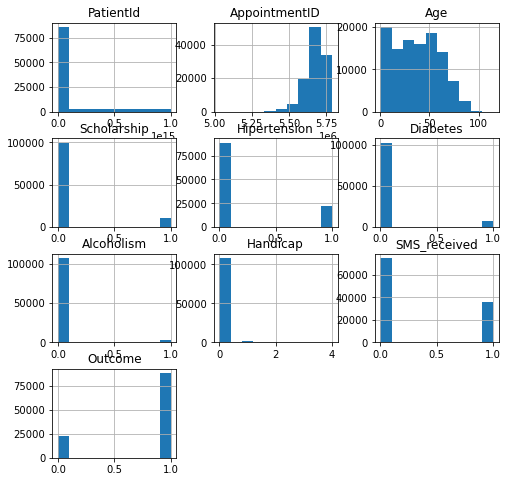

In [15]:

df.hist(figsize = (8,8));

>The histogram above shows a cross-sectional representation of the data in the columns that are compatible (those with integer and float types). From the representation above, it can be seen that some correlations can be deduced. This propelled me to look at how these columns (PatientID, AppointmentID, Age, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, and SMS_received influence the decision of patiennts to show up during their appointments or not. The 'No-show' column that houses the patient's decision is not represented above. In the cells below, I will try to see the reason why and then fix it.

In [16]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Outcome
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1


> From the information about the dataset above, unlike other columns that were represented in the histogram, the No-show wasn't included due to the datatype of the column (string). To solve this, I reprsented the 'No' 'Yes' response with '1' and '0' with 1 representing a patient that visited the hospital while zero representing a patient that did not visit the hospital.

In [17]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Outcome
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [10]:
visited = df.Outcome == False
not_visited =df.Outcome ==True

# visited and not_visited were use to save the 0 and 1 so that these variables can be used subsequently.

In [19]:
visited.sum()

22319

> Total number of patients that visited the hospital for their appoint was 88,208

In [20]:
not_visited.sum()

88207

> Total number of patients that did not visit the hospital for their appoint was 22,319

In [21]:
(visited +not_visited).sum()

110526

sum of visited and not-visited is the total number of patients captured in the dataset.

In [22]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Outcome
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1


>From the table above, No-show have changed to Outcome and Yes and No have been replaced with 0 and 1 respectively. 0 signifies that the patient visited while 1 signifies that the patient did not visit the hospital.

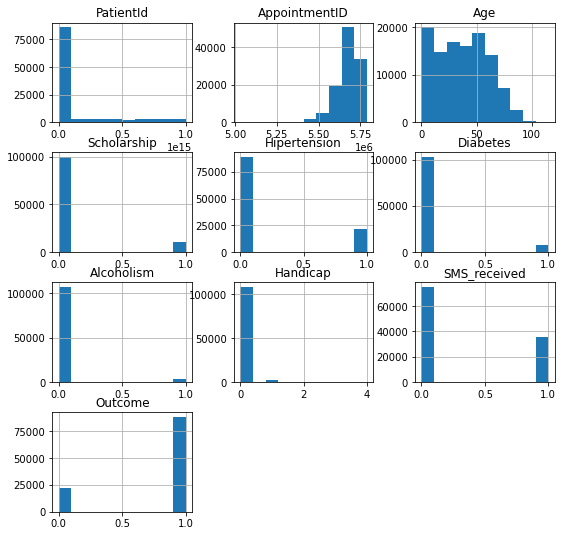

In [23]:
df.hist(figsize=(9,9));

> the Histogram is now showing the Outcome of the patients (whether they visited the hospital (1) or did not visit the hospital (0)

### How's the age distibution of the dataset like?

In [24]:
df.Age.value_counts().sort_values(ascending =False)
#total number of patients within an age bracket, arranged in descending order

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

> Age frequency. 3539 patients are less than 1, 2273 patients are 1

### Number of people within an age bracket that visited the hospital?

In [84]:
df.Age[visited].value_counts().sort_values(ascending =False)

#check the number of patients within an age bracket that visited the hospital for their appointment.

0      639
1      415
17     396
19     394
30     369
      ... 
95       6
115      3
97       2
98       1
96       1
Name: Age, Length: 100, dtype: int64

> This shows the number of people within a particular age that visited the hospital 639 patients below 1 visited the hospital for their appointments (18%).

### summary of the Age column to see how it looks like?

In [87]:
df.Age.describe()

#check the data description of the age column

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

> From the description above, the age column contains 110526 rows. The average age is 37 years.

> The minimum age is 0, while the maximum age is 115 years.

> 25% of the dataset have an average age of 18years, 50% have an average age of 37 years while 75% gave an average age of 55 years.

It can be seen that there are more young people in the dataset than old people. 

#### What is the total number of patients within an age bracket that did not visit the hospital?

In [26]:
df.Age[not_visited].value_counts().sort_values(ascending =False)

#This checks the number of people within an age bracket that did not visit the hospital.

0      2900
1      1858
52     1449
56     1372
2      1366
       ... 
98        5
100       4
102       2
115       2
99        1
Name: Age, Length: 103, dtype: int64

>This shows the number of people within a particular age that did not visit the hospital............. 2900 patients below 1 did not visit the hospital for their appointments (82%).

### Total number of people within an age bracket?

In [27]:
df.Age.value_counts().sort_values( ascending =False)
# arrange the number of patients within an age braket in descending order

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

In [28]:
df.Age.value_counts().unique()
# check the number of patients within an age bracket

array([3539, 2273, 1746, 1652, 1651, 1635, 1629, 1624, 1618, 1613, 1603,
       1580, 1567, 1545, 1536, 1533, 1530, 1526, 1524, 1521, 1513, 1509,
       1505, 1489, 1487, 1469, 1460, 1453, 1452, 1448, 1439, 1437, 1427,
       1425, 1424, 1411, 1403, 1402, 1399, 1394, 1378, 1377, 1376, 1374,
       1372, 1349, 1346, 1344, 1343, 1332, 1331, 1312, 1299, 1283, 1274,
       1272, 1242, 1211, 1195, 1187, 1118, 1103, 1101, 1092, 1012,  973,
        832,  725,  724,  695,  615,  602,  571,  544,  541,  527,  511,
        434,  392,  390,  311,  280,  275,  260,  184,  173,  126,  109,
         86,   66,   53,   33,   24,   17,   11,    6,    5,    4,    2,
          1], dtype=int64)

>This shows the number of patients within a particular age bracket

In [29]:
# check people within an age bracket that visited.
df.Age[visited].value_counts().unique()

array([639, 415, 396, 394, 369, 364, 355, 353, 352, 351, 350, 348, 344,
       343, 340, 332, 331, 330, 329, 323, 322, 321, 320, 319, 318, 317,
       316, 312, 309, 308, 304, 303, 301, 298, 297, 291, 289, 283, 282,
       278, 277, 272, 271, 268, 267, 265, 263, 257, 255, 253, 252, 247,
       236, 212, 200, 182, 179, 169, 167, 148, 121, 118, 101,  96,  94,
        91,  89,  81,  79,  66,  63,  61,  49,  42,  35,  29,  27,  23,
        20,  13,  12,  10,   6,   3,   2,   1], dtype=int64)

> number of patients within a particular age bracket that visited the hospital for their appointment

In [30]:
df.Age[not_visited].value_counts().unique()

#check people within an age bracket that did not visit

array([2900, 1858, 1449, 1372, 1366, 1357, 1354, 1332, 1325, 1322, 1309,
       1284, 1262, 1236, 1216, 1205, 1204, 1198, 1196, 1195, 1177, 1176,
       1175, 1174, 1169, 1168, 1164, 1152, 1151, 1149, 1143, 1137, 1128,
       1127, 1126, 1119, 1116, 1113, 1106, 1101, 1100, 1097, 1089, 1082,
       1073, 1049, 1048, 1038, 1035, 1025, 1017, 1008, 1007, 1006,  980,
        971,  970,  948,  934,  921,  889,  843,  825,  820,  802,  800,
        714,  630,  629,  574,  514,  513,  480,  463,  452,  448,  430,
        371,  329,  326,  276,  226,  219,  218,  157,  144,  114,   86,
         66,   53,   43,   27,   18,   16,    9,    5,    4,    2,    1],
      dtype=int64)

>number of patients within a particular age bracket that did not visit the hospital for their appointment

### Display the age distribution of people that visited against those that did not

In [30]:
def chart_labels(x_axis, y_axis, chart_title):
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(chart_title)
    
    plt.show()

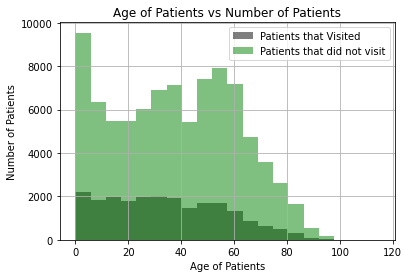

In [31]:
df.Age[visited].hist(alpha =0.5, bins =20, label ="Patients that Visited", color ='black')
df.Age[not_visited].hist(alpha =0.5, bins =20, label ="Patients that did not visit", color ='green')

plt.legend();
chart_labels("Age of Patients", "Number of Patients", "Age of Patients vs Number of Patients")

# Plot the people that either visited the hospital or not against their age distribution.

> From the  graph above, it shows that hospital visits for patients between 0 to 40 years stood between 16,000 to slighty above 20,000.
For patients above 60 years,  there was  a sharp decline in the number of patients that visited the hospital for their appointments.
Also, patients between 0 to 5 recorded the highest number of hospital visit apathy.

In [33]:
df.Scholarship.value_counts()

# check the people that have scholarship

0    99665
1    10861
Name: Scholarship, dtype: int64

> Data above shows that the number of patients with health insurance on the dataset was 10661, while the number of patients without health insurance was 99666. So the majority of sampled patients did were not covered by health insurance.

### Display the response of patients to their appointments based on their scholarship status.

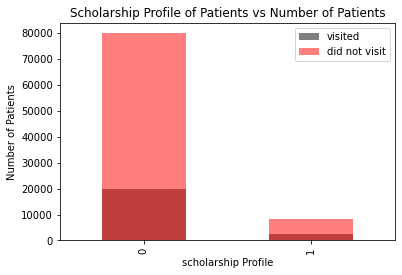

In [22]:

df.Scholarship[visited].value_counts().plot(kind ='bar', alpha = 0.5, color ='black', label ="visited")
df.Scholarship[not_visited].value_counts().plot(kind ='bar', alpha = 0.5, color ='red', label = 'did not visit')

plt.legend();

chart_labels("scholarship Profile", "Number of Patients", "Scholarship Profile of Patients vs Number of Patients")
# plot those that visited or not based on their scholarship status

> This graph shows the representation of patients with health insurance that visited the hospital and did not visit and also patients without health insurance that visited the hospital and did not visit. out of 10,861 patients with health insurance, 8283 of them did not visit the hospital for their appointments (76.2%) while 2578 did not visited (23.7%).
Also, of the 99,666 patients without health insurance, 79925 did not visit the hospital for their appointment (80%)  while 19741  visited the hospital for their appointment (20%)

In [36]:
df.Scholarship[visited].value_counts()

#number of those that visited based on their scholarship

0    19741
1     2578
Name: Scholarship, dtype: int64

> total number of patients under the Government's scholarship programme that visited the hospital for their appointment. 19741 not  under the scholarhip programme visited the hospital while 2578 under the scholarship programme visited for their appointment.

In [37]:
df.Scholarship[not_visited].value_counts()

#number of those that did not visit based on their scholarship

0    79924
1     8283
Name: Scholarship, dtype: int64

> total number of patients under the Government's scholarship programme  that did not visit the hospital for their appointment.  79924 without health insurance did not visit the hospital  while 8283 under the Government's scholarship programme didn't visit the hospital for their appointment.

In [38]:
df.Scholarship[visited].sum()

#total number of people under scholarship that visited

2578

> Total number of people under health insurance that visited the hospital

In [39]:
df.Scholarship[not_visited].sum()

#total number of people under scholarship that did not visit.

8283

>total number of patients with health insurance that did not visit the hospital

In [40]:
df.Scholarship.value_counts()

#total number of those that have scholarship

0    99665
1    10861
Name: Scholarship, dtype: int64

### How does the gender of a patient affect if ht/she visited or not?

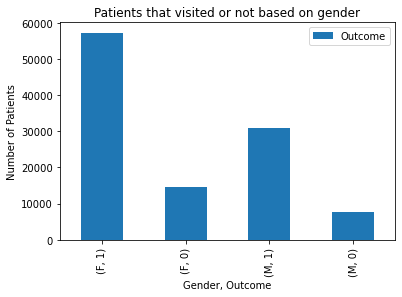

In [36]:
df.groupby('Gender').Outcome.value_counts().plot(kind ='bar')

plt.legend()
chart_labels('Gender, Outcome','Number of Patients','Patients that visited or not based on gender')
plt.show();



#Group patients based on gender and display if they visit or not based on their gender

> For this graph, zero signifies visited while 1 signifies not visited

In [42]:
df.Gender.value_counts()

#breakdown of the total number of males and females

F    71839
M    38687
Name: Gender, dtype: int64

> Number of female patients were 71840 (65% of population) while that of male patients was 38687 (35% of population).


### between males and females, which gender has the highest number of enrolled people under the scholarship?

In [44]:
df.groupby('Gender')['Scholarship'].value_counts()

#Scholarship recipients based on their gender

Gender  Scholarship
F       0              62986
        1               8853
M       0              36679
        1               2008
Name: Scholarship, dtype: int64

> Number of females without insurance was 62987 while 8853 had health insurance.
Number of males without insurance was 36679 while 2008 had health insurance.

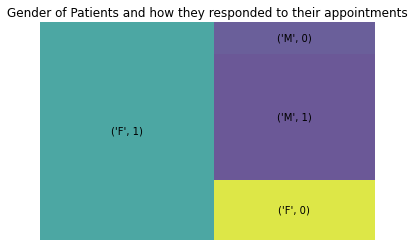

In [45]:
gender_grouped =df.groupby('Gender')[['Outcome']].value_counts()
plt.title('Gender of Patients and how they responded to their appointments')

squarify.plot(sizes = gender_grouped.values, label = gender_grouped.index, alpha =0.8)
plt.axis('off')
plt.show();

#Group patients into gender and display their outcome with a treemap

> for this graph, zero signifies visited while 1 signifies not visited

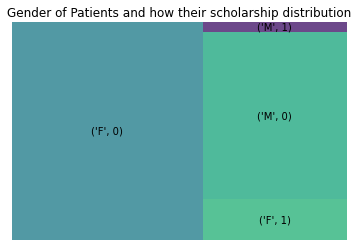

In [46]:
gender_scholar =df.groupby('Gender')[['Scholarship']].value_counts()
plt.title('Gender of Patients and how their scholarship distribution')

squarify.plot(sizes = gender_scholar.values, label = gender_scholar.index, alpha =0.8)
plt.axis('off')
plt.show();

#Group patients into gender and display their enrollment in the scholarship scheme with a treemap

> for this graph, zero signifies a gender(male or female) that does not have scholarship while 1 signifies a gender (male or female) under the government's scholarship

In [47]:
df.query('Gender == "F"')['Age'].median(), df.query('Gender == "M"')['Age'].median()

#Median age of the distribution

(39.0, 33.0)

> Median age of female patients was 39 years while median age of male patients was 33 years.

In [48]:
df.SMS_received.value_counts() 

#Distinguish patients based on those that received SMS and those that did not

0    75044
1    35482
Name: SMS_received, dtype: int64

> 75,045 patients did not recieve SMS while 35482 patients receievd SMS from the hospitals they registered in.

In [49]:
df.SMS_received[not_visited].value_counts()

#Check patients that recieved SMS but did not visit

0    62509
1    25698
Name: SMS_received, dtype: int64



>62510 people that did not receive  SMS also did not visit the hospital for their appointment (83.3%)..........
25698 people that received the SMS did not visit the hospital for their appointment (72.4%)

In [50]:
  df.SMS_received[visited].value_counts()
    
    #Check patients that recieved SMS and also visited

0    12535
1     9784
Name: SMS_received, dtype: int64

> 12,535 people that did not recieve SMS  visited the hospital for their appointment (16.7%)
9784 people that received SMS also visited the hospital for their appointment (27.6%).

In [51]:
df.SMS_received.value_counts()

#Distinguish patients based on those that received SMS and those that did not

0    75044
1    35482
Name: SMS_received, dtype: int64

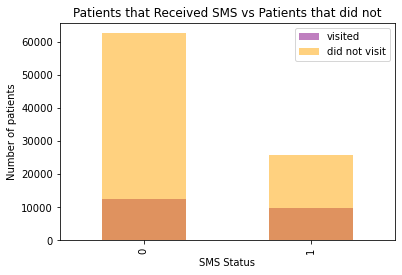

In [38]:

df.SMS_received[visited].value_counts().plot(kind ='bar', alpha = 0.5, color ='purple', label ="visited")
df.SMS_received[not_visited].value_counts().plot(kind ='bar', alpha = 0.5, color ='orange', label = 'did not visit')

plt.legend();

chart_labels('SMS Status','Number of patients','Patients that Received SMS vs Patients that did not' )
#Plot a graph that shows the outcome of patients based on if they received an SMS or not


> For this graph, zero signifies patients that did not receive SMS while 1 signifies patients that received SMS.

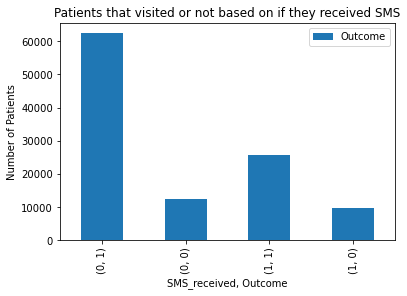

In [39]:
df.groupby('SMS_received').Outcome.value_counts().plot(kind ='bar')

plt.legend()
chart_labels('SMS_received, Outcome', 'Number of Patients', 'Patients that visited or not based on if they received SMS' )
plt.show();


#Group Patients into if they received SMS or not and check the number of outcome

>On this chart;
the first zero (0) on the x-axis signifies that the patient did not receive SMS.....

>the second zero (0) on the x-axis signifies that the patient visited the hospital for his/her appointment.......

>the first one (1) on the x-axis signifies that the patient  receiveed SMS......

>the second one (1) on the x-axis signifies that the patient  did not visit the hospital for his/her appointment......

>83% of users did not receive SMS and did not visit the hospital.
72% of users received SMS and did not visit the hospital.
16.7% of users did not recieve SMS but visited the hospital.
27.3% of users recieved an SMS and visited the hospital.


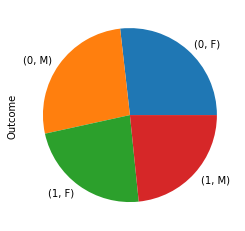

In [54]:

df.groupby(['SMS_received', 'Gender']).Outcome.mean().plot(kind='pie');


# a pie chart that shows the outcome of a group that is based on if the patient received Sms and also the gender

>For this chart, 0 signifies the total sum of a gender( male or female) that did not receive SMS while 1 sifnifies the total sum of a gender ( male or female) that received SMS.

### what is the response of patients based on their alcohol profile, gender and also if they received sms

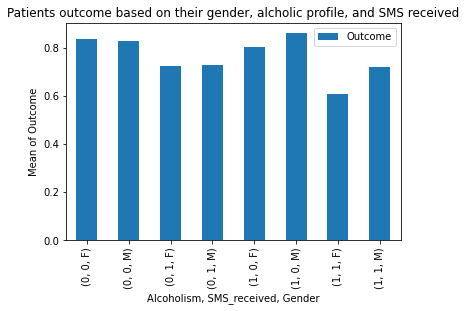

In [40]:
df.groupby(['Alcoholism', 'SMS_received', 'Gender']).Outcome.mean().plot(kind='bar');

plt.legend()
chart_labels('Alcoholism, SMS_received, Gender', 'Mean of Outcome',  'Patients outcome based on their gender, alcholic profile, and SMS received')
plt.show();


#A  group made up of alcohol profile of patient, SMS recieved and gender. 
# this graph shows the mean outcome of this group

> For this graph,
a) the first zero on the x-axis signifies the mean outcome of  non drinking patients....... 
a) the second zero on the x-axis signifies the mean outcome of patients that did not receive SMS........
c) the third zero on the x-axis signifies the mean outcome of the gender of patients........
d) the first one on the x-axis signifies the mean outcome of alcoholic patients........
e) the first one on the x-axis signifies the mean outcome of patients that received SMS........
f)the first one on the x-axis signifies the mean outcome of the gender of patients........


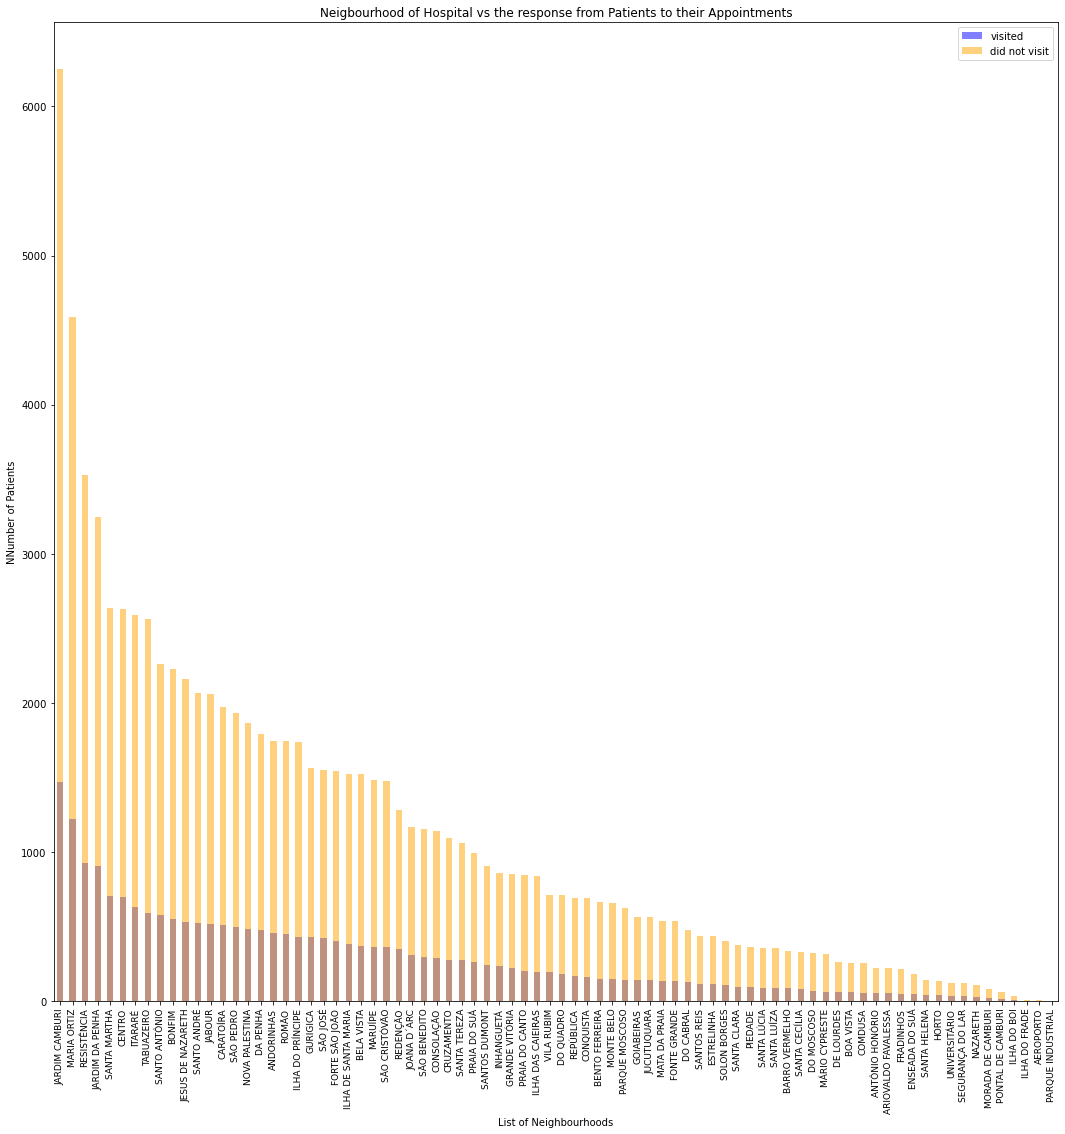

In [50]:


df.Neighbourhood[visited].value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='visited', figsize =(18,18))
df.Neighbourhood[not_visited].value_counts().plot(kind='bar',alpha=0.5, color= 'orange', label='did not visit', figsize =(18,18))
plt.legend()
plt.ylabel('NNumber of Patients')
plt.xlabel('List of Neighbourhoods')
plt.xticks(fontsize = 9)
plt.title('Neigbourhood of Hospital vs the response from Patients to their Appointments')
plt.show();

#Plot based on the hospitals' neighbourhood and the outcome of patients.

>Graph showing the visit frequency of patients to the hospital for their appointments based on the Neighbourhood the hospital is situated at. Some Neighourhoods scored visits as high as 1400 visits  while others score as low as 1 visit. From the graph, we can deduce that there's a direct correlation between the hospital's neighbourhood  and hospital visits  by patients.

In [57]:
df.Neighbourhood.value_counts().sort_values( ascending =False)

#check the neighbourhood visits 

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

> This shows the list of neighbourhoods and their number of recorded visits ..... 7717 patients were recorded for Jardim Camburi, Maria Ortiz had 5805 recorded visits..... at thesame time, Parque Industrial recorded 1 patient.

### what is the breakdown of the Neighbourhood column?

In [58]:
df.Neighbourhood.value_counts().sort_values( ascending =False).describe()

#breakdown of the details of the neighbourhood column

count      81.000000
mean     1364.518519
std      1369.191779
min         1.000000
25%       413.000000
50%       851.000000
75%      2018.000000
max      7717.000000
Name: Neighbourhood, dtype: float64

> This is a breakdown of how the total records  per  neighbourhood looked like.
Total number of neighbourhoods captured in the dataset = 81...
The average patient  visit recorded per neighbourhood was 1364....
Standard Deviation of 1369.....
25% of the neighbourhoods had an average visit of 413.....
50% of the neighbourhoods had an average visit of 851.....
75% of the neighbourhoods had an average visit of 2018....
One neighbourhood recorded 7717 patients. This was the highest score recorded.

In [59]:
df.Neighbourhood.unique()

#display all the neighbourhoods captured in this dataset

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

> This is a breakdown of all the neighbourhoods captured in the dataset.

In [60]:
df.Neighbourhood[visited].value_counts().sort_values( ascending =False)

#total number of visits based on neighbourhood

JARDIM CAMBURI                 1465
MARIA ORTIZ                    1219
ITARARÉ                         923
RESISTÊNCIA                     906
CENTRO                          703
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHAS OCEÂNICAS DE TRINDADE       2
ILHA DO FRADE                     2
AEROPORTO                         1
Name: Neighbourhood, Length: 80, dtype: int64

> This is a breakdown of the total hospital visits from a unique neighbourhood. 
It was recorded that Jardin Camburi neighbourhood recorded 1465 hospital visits while Aeroporto recorded the least hospital visit, 1.

In [61]:
df.Neighbourhood[not_visited].value_counts().sort_values( ascending =False)

#patients that were captured within a neighbourhood but did not visit for their checkup

JARDIM CAMBURI       6252
MARIA ORTIZ          4586
RESISTÊNCIA          3525
JARDIM DA PENHA      3246
SANTA MARTHA         2635
                     ... 
PONTAL DE CAMBURI      57
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: Neighbourhood, Length: 80, dtype: int64

 > This is a breakdown of the  patients that did  not visit the hospital for their appointment based on the neighbourhood of the hospital..... Of all the patients that were  meant to visit the hospital in Jardim Camburi neighbourhood, 6252 did not visit the hospital for their appointment. This was the highest hospital visit apathy recorded in this dataset.
 


In [62]:
df.Neighbourhood.value_counts().unique()

#breakdown of total records per neighbourhood

array([7717, 5805, 4431, 3877, 3514, 3334, 3132, 3131, 2853, 2773, 2746,
       2571, 2565, 2509, 2448, 2266, 2264, 2262, 2217, 2214, 2018, 1977,
       1907, 1902, 1889, 1885, 1836, 1553, 1439, 1427, 1398, 1376, 1332,
       1288, 1276, 1071, 1057, 1035,  858,  851,  849,  835,  824,  802,
        700,  694,  682,  644,  560,  547,  538,  506,  469,  452,  448,
        438,  428,  423,  413,  371,  312,  310,  305,  282,  271,  258,
        235,  178,  175,  152,  145,  135,   96,   69,   35,   10,    8,
          2,    1], dtype=int64)

> shows the records of patients that registered for an appointment based on the neighbourhood of the hospital.

In [63]:
df.Neighbourhood[visited].value_counts().unique()

#breakdown of total recorded visits per neighbourhood

array([1465, 1219,  923,  906,  703,  696,  631,  591,  573,  550,  532,
        521,  515,  508,  496,  484,  474,  456,  451,  429,  428,  424,
        402,  384,  369,  363,  361,  346,  304,  294,  287,  275,  272,
        258,  237,  235,  217,  202,  193,  190,  179,  166,  160,  149,
        143,  141,  140,  137,  134,  133,  123,  112,  110,  106,   92,
         91,   88,   86,   77,   69,   62,   58,   56,   54,   52,   50,
         48,   47,   42,   37,   32,   29,   28,   16,   12,    3,    2,
          1], dtype=int64)

> Shows hospital visits per neighbourhood in descending order.

In [64]:
df.Neighbourhood[not_visited].value_counts().unique()

#breakdown of total non visits per neighbourhood

array([6252, 4586, 3525, 3246, 2635, 2631, 2591, 2559, 2262, 2223, 2157,
       2063, 2058, 1974, 1933, 1862, 1788, 1741, 1740, 1734, 1562, 1549,
       1543, 1524, 1523, 1478, 1473, 1278, 1169, 1152, 1139, 1094, 1060,
        994,  907,  855,  854,  845,  836,  710,  709,  692,  689,  665,
        658,  623,  563,  561,  534,  533,  472,  435,  432,  400,  372,
        364,  352,  351,  332,  325,  321,  317,  258,  254,  221,  220,
        210,  183,  141,  133,  120,  117,  106,   80,   57,   32,    8,
          7,    1], dtype=int64)

> Shows hospital visit apathy per neighbourhood in descending order.

In [65]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Outcome
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [66]:
df.Hipertension.value_counts()

#check the patients' hipertension profile

0    88725
1    21801
Name: Hipertension, dtype: int64

>88,726 patients were not hipertensive while 21,801 were hipertensive

In [68]:
df.Hipertension[visited].value_counts()


#check the outcome of patients that visited based on their hipertension profile

0    18547
1     3772
Name: Hipertension, dtype: int64

> 18,547 non-hipertensive  patients visited the hospital (21% non-hipertensive people visited)..........
3772 hipertensive patients visited the hospital (17% hipertensive people visited)

In [69]:
df.Hipertension[not_visited].value_counts()

#check the outcome of patients that did not visit based on their hipertension profile

0    70178
1    18029
Name: Hipertension, dtype: int64

> 70,178 non-hipertensive people did not visit the hospital (79% non-hipertensive did not visit)
18,029 hipertensive people did not visit the hospital (83% hipertensive did not visit)

In [51]:
df.groupby('Gender')['Hipertension'].value_counts()


#group patients by gender, and their hipertension profile

Gender  Hipertension
F       0               56500
        1               15339
M       0               32225
        1                6462
Name: Hipertension, dtype: int64

> 70% of hipertensive patients were females while 30% were males.

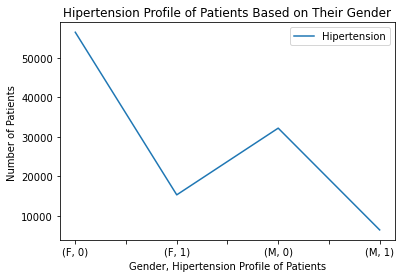

In [54]:
df.groupby('Gender')['Hipertension'].value_counts().plot()

plt.legend()

chart_labels('Gender, Hipertension Profile of Patients','Number of Patients ' ,'Hipertension Profile of Patients Based on Their Gender')
plt.show();

# plot a graph of the group based on their gender and hipertension profile against number of patients

> zero on the x-axis signifies that the patients donot have Hipertension...........
 one on the y-axis signifies that the pateitns have Hipertension

In [72]:
df.Hipertension.value_counts()

0    88725
1    21801
Name: Hipertension, dtype: int64

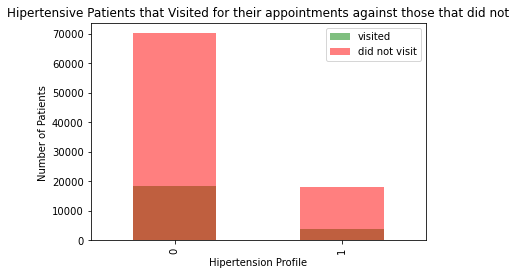

In [55]:
df.Hipertension[visited].value_counts().plot(kind ='bar', alpha = 0.5, color ='green', label ="visited")
df.Hipertension[not_visited].value_counts().plot(kind ='bar', alpha = 0.5, color ='red', label = 'did not visit')

plt.legend();

chart_labels('Hipertension Profile', 'Number of Patients ', 'Hipertensive Patients that Visited for their appointments against those that did not')

#plot a graph of those that visited or not based on their hipertension profile

> Zero on the x- axis of this chart signifies that the patients do not have Hipertension.........
One on the x-axis of this chart signifies that the patients are Hipertensive.


In [74]:
df.Alcoholism.value_counts()

#breakdown of paptients' drinking habuit

0    107166
1      3360
Name: Alcoholism, dtype: int64

> 107167 patients were not heavy drinkers......
3360 of the patients were heavy drinkers


In [178]:
df.Alcoholism[visited].value_counts()

#heavy drinkers that visited

0    21642
1      677
Name: Alcoholism, dtype: int64

> 21642  non-drinkers visited the hospital for their appointment (20%).
677 heavy drinkers visited the hospital for their appointment (20%)

In [75]:
df.Alcoholism[not_visited].value_counts()


#heavy drinkers that did not visit

0    85524
1     2683
Name: Alcoholism, dtype: int64

> 85524 non-drinkers did not visit  the hospital for their appointment (80%)...... 2683 heavy drinkers did not visit the hospiital for their appointment (80%)

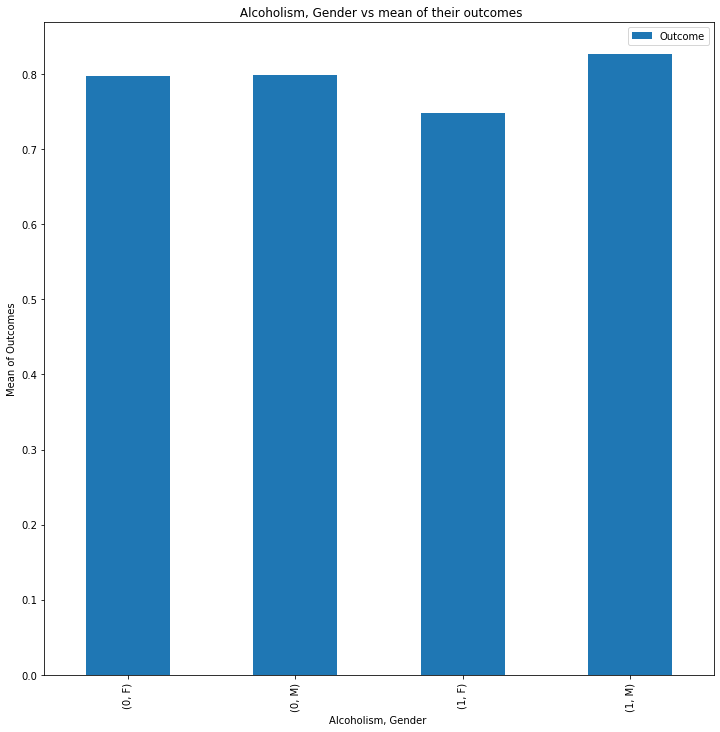

In [61]:
df.groupby(['Alcoholism', 'Gender']).Outcome.mean().plot(kind='bar', figsize= (12,12));
plt.legend()

chart_labels('Alcoholism, Gender ', 'Mean of Outcomes', ' Alcoholism, Gender vs mean of their outcomes')

plt.show()
#plot a mean of outcome based on a group comprising of Patients' drinking habit and gender


> Zero on the x- axis of this chart signifies that the patients are not heavy drinkers......... One on the x-axis of this chart signifies that the patients are Heavy drinkers.

In [77]:
df.Diabetes.value_counts()

#diabetics profile of patients

0    102583
1      7943
Name: Diabetes, dtype: int64

102584 patients were not diabetic. 7943 patients were diabetic

In [78]:
df.Diabetes[visited].value_counts()

#diabetic patients that visited

0    20889
1     1430
Name: Diabetes, dtype: int64

>20889 non-diabetic patients visited the hospital(20.4%)................ 1430 diabetic patients visited the hospital (18%).

In [79]:
df.Diabetes[not_visited].value_counts()

#diabetic patients that did  not visit

0    81694
1     6513
Name: Diabetes, dtype: int64

>81694 non-diabetic patients did not visit the hospital(79.6%)................ 6513 diabetic patients did not visit the hospital (82%).

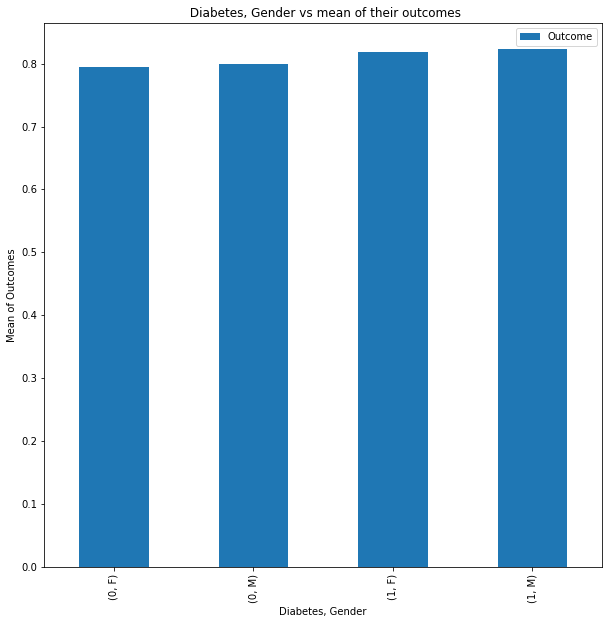

In [63]:
df.groupby(['Diabetes', 'Gender']).Outcome.mean().plot(kind='bar', figsize =(10,10));

plt.legend()
chart_labels('Diabetes, Gender','Mean of Outcomes', ' Diabetes, Gender vs mean of their outcomes' )
plt.show();


#group based on diabetic profile and gender. check the outcome of this group

> Zero on the x- axis of this chart signifies that the patients are not diabetic......... One on the x-axis of this chart signifies that the patients are Diabetic.

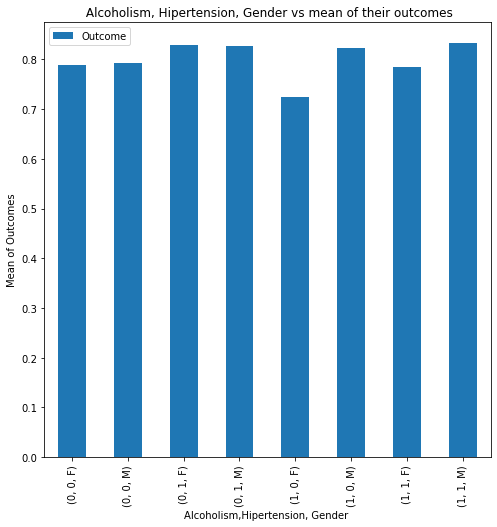

In [66]:
df.groupby(['Alcoholism', 'Hipertension', 'Gender']).Outcome.mean().plot(kind='bar', figsize=(8,8));

plt.legend()
chart_labels('Alcoholism,Hipertension, Gender ', 'Mean of Outcomes', ' Alcoholism, Hipertension, Gender vs mean of their outcomes')
plt.show()

#check the outcome of a group based on aloholic profile, hipertenive profile and gender

> For this graph, a) the first zero on the x-axis signifies the mean outcome of non drinking patients....... a) the second zero on the x-axis signifies the mean outcome of patients that are not Hipeertensive........ c) the third zero on the x-axis signifies the mean outcome of the gender(male or female) of patients........ d) the first one on the x-axis signifies the mean outcome of alcoholic patients........ e) the first one on the x-axis signifies the mean outcome of patients that are Hipertensive........ f)the first one on the x-axis signifies the mean outcome of the gender of patients (male or female)........

In [82]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Outcome
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1


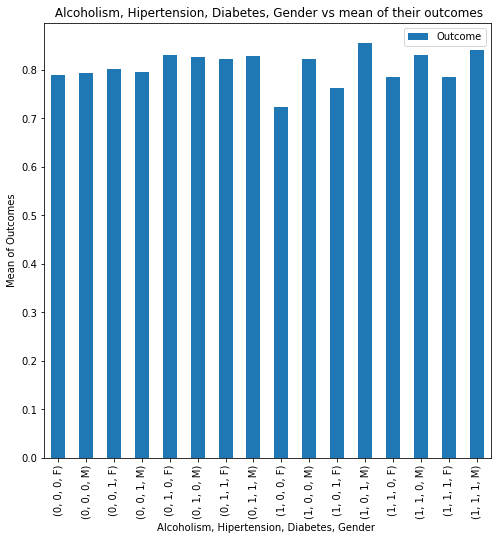

In [67]:
df.groupby(['Alcoholism', 'Hipertension', 'Diabetes','Gender']).Outcome.mean().plot(kind='bar', figsize =(8,8))

plt.legend()
chart_labels('Alcoholism, Hipertension, Diabetes, Gender ', 'Mean of Outcomes', ' Alcoholism, Hipertension, Diabetes, Gender vs mean of their outcomes')

#Outcome of a group based on alcoholic profile, hipertensive profile, diabetic profile and gender

> For this graph, a) the first zero on the x-axis signifies the mean outcome of non drinking patients....... a) the second zero on the x-axis signifies the mean outcome of Hipertensive patients........ c) the third zero on the x-axis signifies the mean outcome Diabetic patients........ d) the first one on the x-axis signifies the mean outcome of alcoholic patients........ e) the first one on the x-axis signifies the mean outcome of Hipertensive Patients........ f)the first one on the x-axis signifies the mean outcome of Diabetic patients........

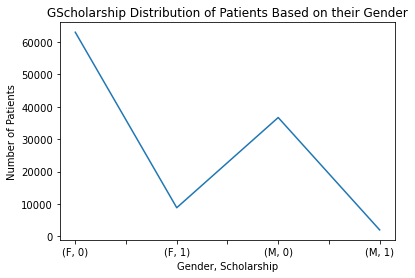

In [85]:
gender_scholar =df.groupby('Gender')[['Scholarship']].value_counts().plot()
plt.title('GScholarship Distribution of Patients Based on their Gender')

plt.ylabel('Number of Patients')
plt.xlabel('Gender, Scholarship')

plt.show();


#line graph of a gender and scholarship group

In [86]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Outcome
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1


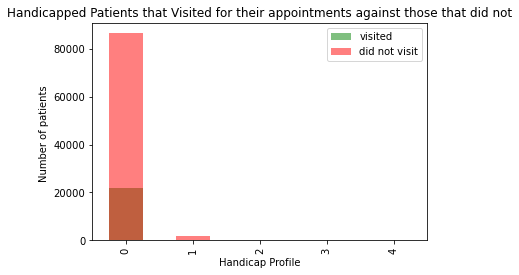

In [68]:
df.Handicap[visited].value_counts().plot(kind ='bar', alpha = 0.5, color ='green', label ="visited")
df.Handicap[not_visited].value_counts().plot(kind ='bar', alpha = 0.5, color ='red', label = 'did not visit')

plt.legend();

chart_labels('Handicap Profile','Number of patients ', 'Handicapped Patients that Visited for their appointments against those that did not'  )

#plot a graph of the outcome of handicapped patients that visited agaist those that did not

In [88]:
df.Handicap.value_counts()

#patients that are handicapped

0    108285
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

In [89]:
df.Handicap[visited].value_counts()

#handicapped patients that visited

0    21912
1      366
2       37
3        3
4        1
Name: Handicap, dtype: int64

In [90]:
df.Handicap[not_visited].value_counts()

#handicapped patients that did not visit

0    86373
1     1676
2      146
3       10
4        2
Name: Handicap, dtype: int64

In [91]:
df.shape

(110526, 14)

In [92]:
df.groupby('Gender').Handicap.value_counts()


#Handicapped patients based on their gender

Gender  Handicap
F       0           70549
        1            1181
        2             105
        3               3
        4               1
M       0           37736
        1             861
        2              78
        3              10
        4               2
Name: Handicap, dtype: int64

<a id='conclusions'></a>
## Conclusions

>RESULTS:

> The summary from the result;
Having analyzing the hospital dataset, some of the factors that were spotted to be important in order to predict if a patient will show up for their scheduled appointment are listed below;

> 1)  The scholarship status of the patients do not actually influence if the patient will show up for his/her appointment or not.

> 2) Patients that are diabetic, hipertensive, and heavy drinkers are slightly likely to show up for their appointments than those without them. Also,the probability of  Male patients with these features to show up for their appointments is higher than that of females with these features.

> 3) Age of the patients. Patients aged 0 - 60 years showed a fairly uniform  pattern in their decision to either show up or not. Beyond 60, this pattern was  also uniform and steep.

>4) Patients that are handicapped: Male Handicapped patients are more likely to visit fot their appointment than female handicapped patients.

>5) Patients are 11% more likely to visit the hospital if they recieve SMS than if they did not receive SMS.

>6) Non-heavy female drinkers are more likely to visit the hospital for their appointment than heavy female drinkers. While Heavy male drinkers are more likely to show up than non-heavy male drinkers.






>LIMITATIONS:

>1) we have more categorical variables which are not flexible enough to allow statistical methods like line graphs, scatterplots that will show correlation.

>2) Details availabe to draw conclusions from certain factors are limited. For the hospitals in neighbourhoods that see hugh hospital visits, we do not know if it is because of the population density around those neighbourhoods, or if their services are cheaper, or if they offer free services,  or due to the fact that the hospitals around those neighbourhoods offer better services.






